In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('heart_2.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0
26082,67.0,0.0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Cek duplikat
print(df.duplicated().sum())

# Tampilkan baris duplikat
df[df.duplicated()]


0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [7]:
print('check missing value')
df.isna().sum()

check missing value


age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [8]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_1876\2137331039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


In [9]:
df = df.drop_duplicates()


target
1    14274
0    11795
Name: count, dtype: int64


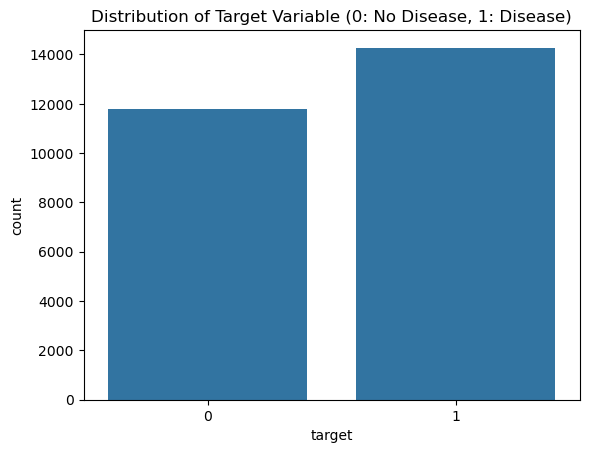

In [10]:
target_counts = df['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

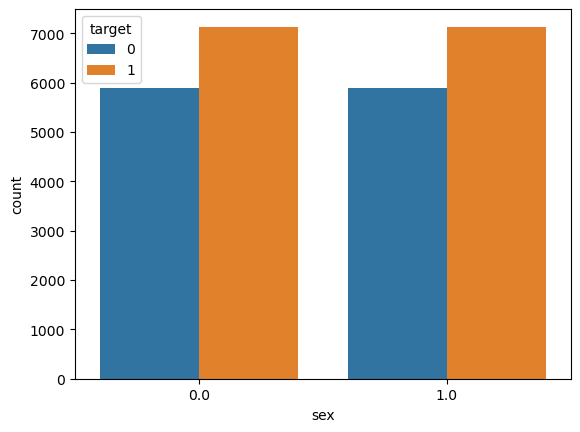

In [11]:
sns.countplot(data=df, x='sex', hue='target')
plt.show()

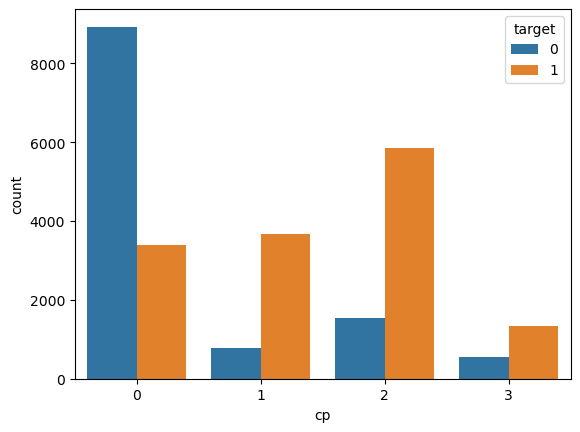

In [12]:
sns.countplot(data=df, x='cp', hue='target')
plt.show()

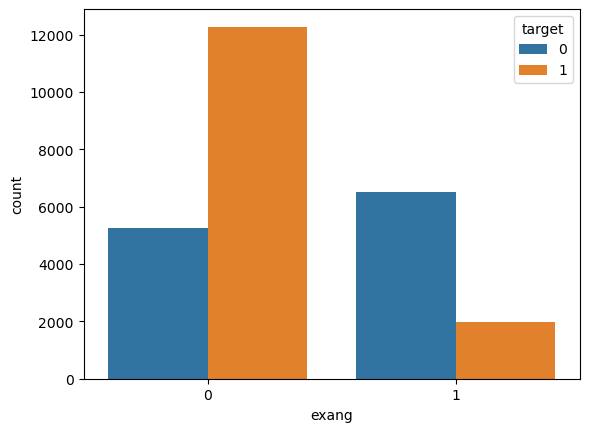

In [13]:
sns.countplot(data=df, x='exang', hue='target')
plt.show()

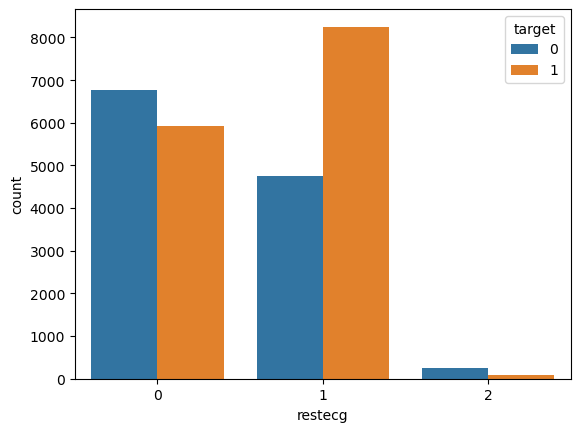

In [14]:
sns.countplot(data=df, x='restecg', hue='target')
plt.show()

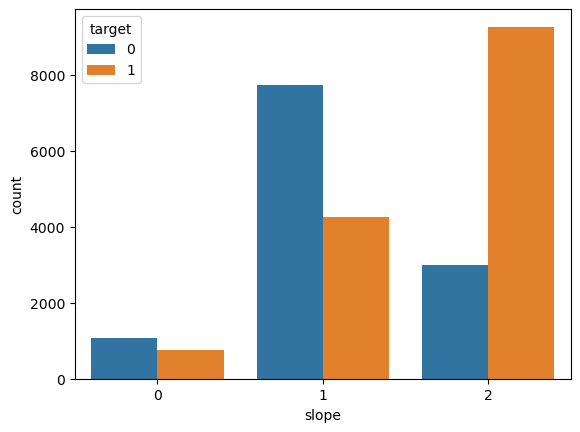

In [15]:
sns.countplot(x="slope", data=df,hue="target")
plt.show()

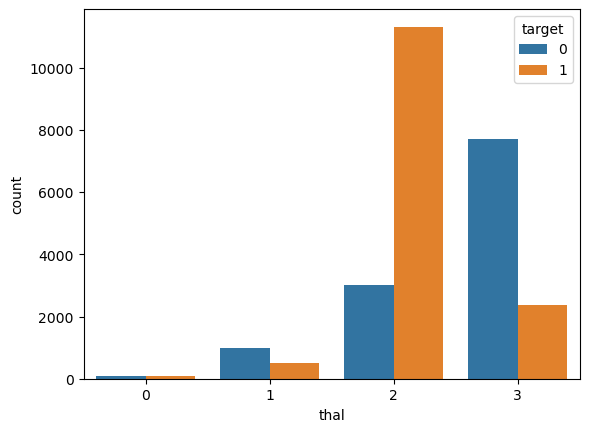

In [16]:
sns.countplot(x="thal", data=df,hue="target")
plt.show()

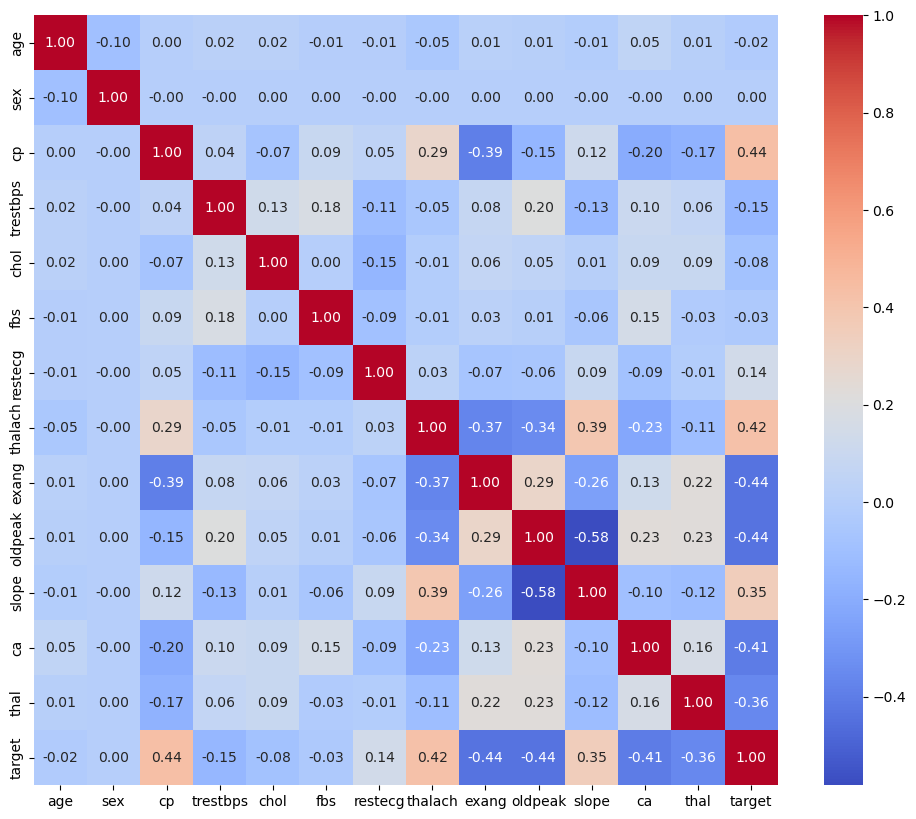

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
X = df.drop('target', axis=1)
y = df['target']


In [20]:
scaler_x = MinMaxScaler()



In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [23]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [24]:


def scaling(x1, x2, scaler) : 
	x1 = scaler.fit_transform(x1)
	x2 = scaler.transform(x2)
	return x1, x2, scaler

x_train, x_test, scaler_x = scaling(x_train, x_test, scaler_x)

--- Training Logistik Regresi ---

--- Results for Logistik Regresi ---
Training Accuracy: 0.8596
Test Accuracy: 0.8656
Test ROC AUC: 0.9147
Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      2343
           1       0.84      0.94      0.88      2871

    accuracy                           0.87      5214
   macro avg       0.87      0.86      0.86      5214
weighted avg       0.87      0.87      0.86      5214

Test Confusion Matrix:
 [[1827  516]
 [ 185 2686]]


c:\Users\ACER\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


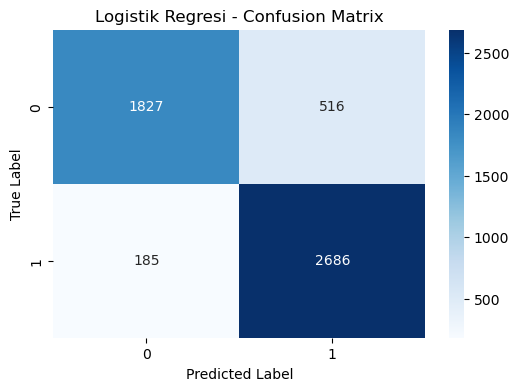

------------------------------
--- Training Random Forest ---


c:\Users\ACER\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



--- Results for Random Forest ---
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Test ROC AUC: 1.0000
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2343
           1       1.00      1.00      1.00      2871

    accuracy                           1.00      5214
   macro avg       1.00      1.00      1.00      5214
weighted avg       1.00      1.00      1.00      5214

Test Confusion Matrix:
 [[2343    0]
 [   0 2871]]


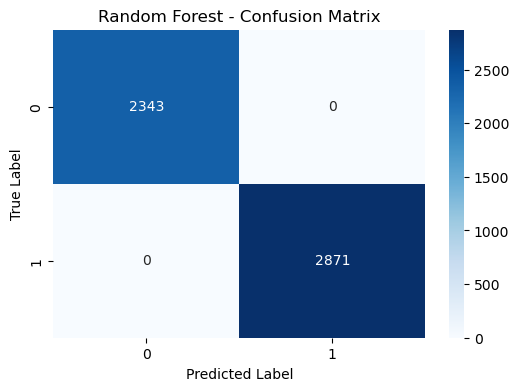

------------------------------
--- Training Support Vector Machine ---


c:\Users\ACER\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- Results for Support Vector Machine ---
Training Accuracy: 0.9536
Test Accuracy: 0.9588
Test ROC AUC: 0.9885
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2343
           1       0.96      0.96      0.96      2871

    accuracy                           0.96      5214
   macro avg       0.96      0.96      0.96      5214
weighted avg       0.96      0.96      0.96      5214

Test Confusion Matrix:
 [[2229  114]
 [ 101 2770]]


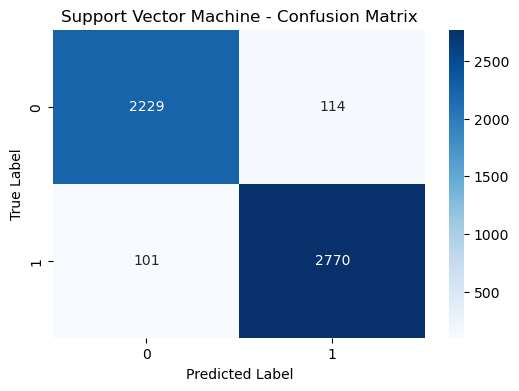

------------------------------
--- Training Gradient Boost ---


c:\Users\ACER\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- Results for Gradient Boost ---
Training Accuracy: 0.9846
Test Accuracy: 0.9864
Test ROC AUC: 0.9994
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2343
           1       0.98      1.00      0.99      2871

    accuracy                           0.99      5214
   macro avg       0.99      0.98      0.99      5214
weighted avg       0.99      0.99      0.99      5214

Test Confusion Matrix:
 [[2272   71]
 [   0 2871]]


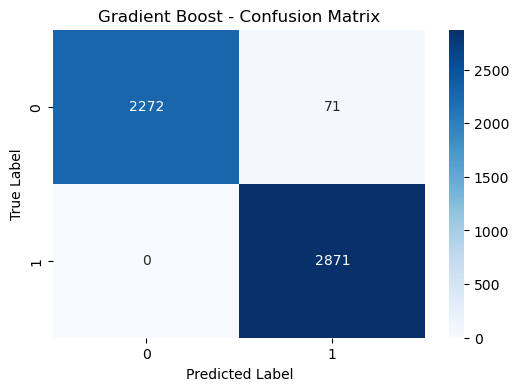

------------------------------


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistik Regresi": LogisticRegression(C=10, max_iter=100, penalty='l1', solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
}

results = {}

for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model
    model.fit(x_train, y_train)

    # Predict
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(x_test)[:, 1]
    else:
        y_prob_test = model.decision_function(x_test)

    # Evaluate
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_prob_test)

    # Store
    results[name] = {
        "model": model,
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test,
        "classification_report": report_test,
        "confusion_matrix": cm_test,
        "roc_auc": roc_auc,
        "y_pred": y_pred_test,
        "y_prob": y_prob_test
    }

    # Print results
    print(f"\n--- Results for {name} ---")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    print("Test Classification Report:\n", report_test)
    print("Test Confusion Matrix:\n", cm_test)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("-" * 30)


In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
import gradio as gr
import numpy as np

# Ambil model dan scaler
model = results["Logistik Regresi"]["model"]
scaler = scaler_x

# Fungsi prediksi + rekomendasi per 10%
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    try:
        input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]], dtype=float)
        input_data_scaled = scaler.transform(input_data)
        pred = model.predict(input_data_scaled)[0]
        prob = model.predict_proba(input_data_scaled)[0][1]
        risk_percent = prob * 100

        hasil = "🟥 **Positive (risk detected)**" if pred == 1 else "🟩 **Negative (low risk)**"
        hasil_text = f"{hasil} - 🔢 **Estimated Risk Probability:** {risk_percent:.2f}%"

        # Rekomendasi per 10%
        if risk_percent < 10:
            rekomendasi = (
                "🟩 **Sangat Rendah (0-10%)**\n"
                "- 🏃 Bebas olahraga (jogging, gym, dll)\n"
                "- 💧 Cukup minum dan istirahat\n"
                "- 💪 Pertahankan gaya hidup aktif"
            )
        elif risk_percent < 20:
            rekomendasi = (
                "🟩 **Rendah (10-20%)**\n"
                "- 🚴 Rutin bersepeda/jalan pagi\n"
                "- 🧘 Tambahkan yoga ringan\n"
                "- 🕒 Durasi: 30-45 menit, 3-5x/minggu"
            )
        elif risk_percent < 30:
            rekomendasi = (
                "🟨 **Sedang (20-30%)**\n"
                "- 🧘 Fokus olahraga intensitas sedang (yoga, jalan cepat)\n"
                "- 🕒 Durasi: 25-40 menit, 3-4x/minggu\n"
                "- 🩺 Cek rutin tekanan darah"
            )
        elif risk_percent < 50:
            rekomendasi = (
                "🟧 **Cukup Tinggi (30-50%)**\n"
                "- 🚶 Jalan kaki atau stretching\n"
                "- 🕒 Durasi: 20-30 menit, 2-4x/minggu\n"
                "- 💬 Konsultasikan dengan dokter"
            )
        elif risk_percent < 70:
            rekomendasi = (
                "🟥 **Tinggi (50-70%)**\n"
                "- 🧘 Hanya yoga ringan atau jalan pelan\n"
                "- ❗ Hindari aktivitas berat\n"
                "- 📋 Wajib pemeriksaan medis lanjutan"
            )
        else:
            rekomendasi = (
                "🔴 **Sangat Tinggi (70–100%)**\n"
                "- ⚠️ Jangan lakukan olahraga tanpa pengawasan dokter\n"
                "- 🛌 Fokus pada istirahat dan terapi\n"
                "- 👨‍⚕️ Konsultasi dan pemeriksaan menyeluruh"
            )

        return hasil_text, rekomendasi

    except Exception as e:
        return f"❌ Error: {str(e)}", "🚫 Tidak ada rekomendasi tersedia."

# Komponen input
inputs = [
    gr.Slider(10, 100, step=1, label="Age (years)"),
    gr.Radio([0, 1], label="Sex (0: Female, 1: Male)"),
    gr.Dropdown(choices=[0, 1, 2, 3], label="Chest Pain Type (0–3)"),
    gr.Slider(80, 200, step=1, label="Resting Blood Pressure (mm Hg)"),
    gr.Slider(100, 600, step=1, label="Serum Cholestoral (mg/dl)"),
    gr.Radio([0, 1], label="Fasting Blood Sugar > 120 mg/dl? (0 = No, 1 = Yes)"),
    gr.Radio([0, 1, 2], label="Resting ECG (0 = Normal, 1 = ST abnormality, 2 = LVH)"),
    gr.Slider(60, 210, step=1, label="Maximum Heart Rate Achieved"),
    gr.Radio([0, 1], label="Exercise Induced Angina (0 = No, 1 = Yes)"),
    gr.Slider(0.0, 6.0, step=0.1, label="Oldpeak (ST depression)"),
    gr.Radio([0, 1, 2], label="Slope of ST Segment (0 = Down, 1 = Flat, 2 = Up)"),
    gr.Slider(0, 3, step=1, label="Number of Major Vessels (0–3)"),
    gr.Radio([0, 1, 2], label="Thal (0 = Normal, 1 = Fixed defect, 2 = Reversible defect)")
]

# Komponen output
output_prediksi = gr.Markdown()
output_rekomendasi = gr.Markdown()

# Interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=inputs,
    outputs=[output_prediksi, output_rekomendasi],
    title="💓 Heart Disease Prediction with Risk Analysis 💓",
    description="Halo Teman-teman ayo jaga kesehatan Jantung Kalian Ya🫀 agar tetap KINCLONG KAYAK EMOT INI💖💖💖"
)

iface.launch(share=True)


ModuleNotFoundError: No module named 'gradio'